# Interpolation

## Newton


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def coeffts(xData,yData):
    m = len(xData)  # Number of data points
    a = yData.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a


def evalPoly(a,xData,x):
    n = len(xData) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p


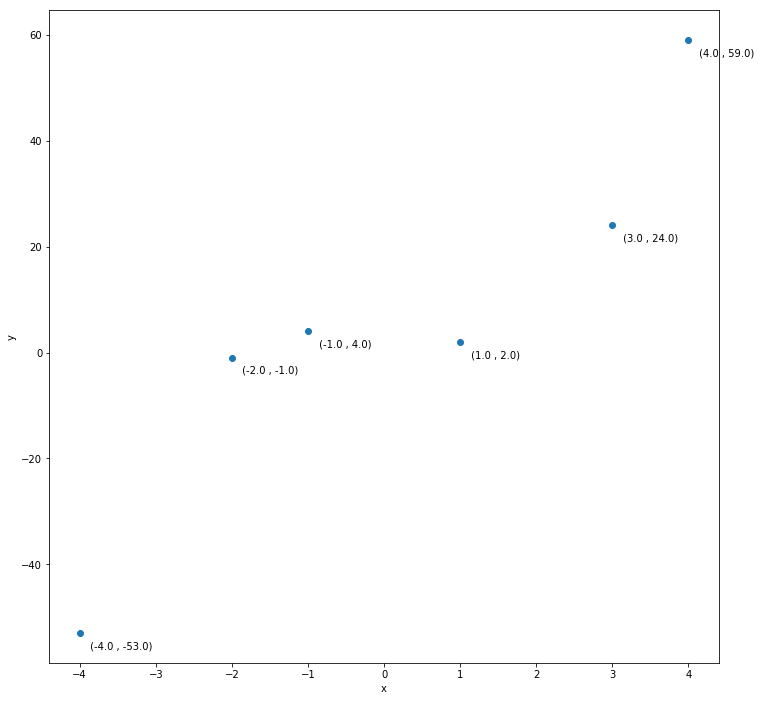

In [2]:
xData = np.array([-2, 1, 4, -1, 3, -4], dtype=np.float32)
yData = np.array([-1, 2, 59, 4, 24, -53], dtype=np.float32)

# Plot the points using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(xData, yData, 'o')
plt.xlabel('x')
plt.ylabel('y')

for i in range(len(xData)):
    ax.annotate(" (%.1f , %.1f)" % (xData[i],yData[i]) , xy=(xData[i], yData[i]), xytext=(xData[i]+0.1, yData[i]-3) )


### compute the coeficients

In [3]:
a = coeffts(xData, yData)
a

array([-1.,  1.,  3.,  1.,  0.,  0.], dtype=float32)

### evaluate the polynomial into a few points

In [4]:
for x in [-4,-3,-2,-1,0,1,2,3,4]:
    print("%2i"%x, "-->", evalPoly(a, xData, x) )

-4 --> -53.0
-3 --> -18.0
-2 --> -1.0
-1 --> 4.0
 0 --> 3.0
 1 --> 2.0
 2 --> 7.0
 3 --> 24.0
 4 --> 59.0


### evaluate the function in many more points and draw it

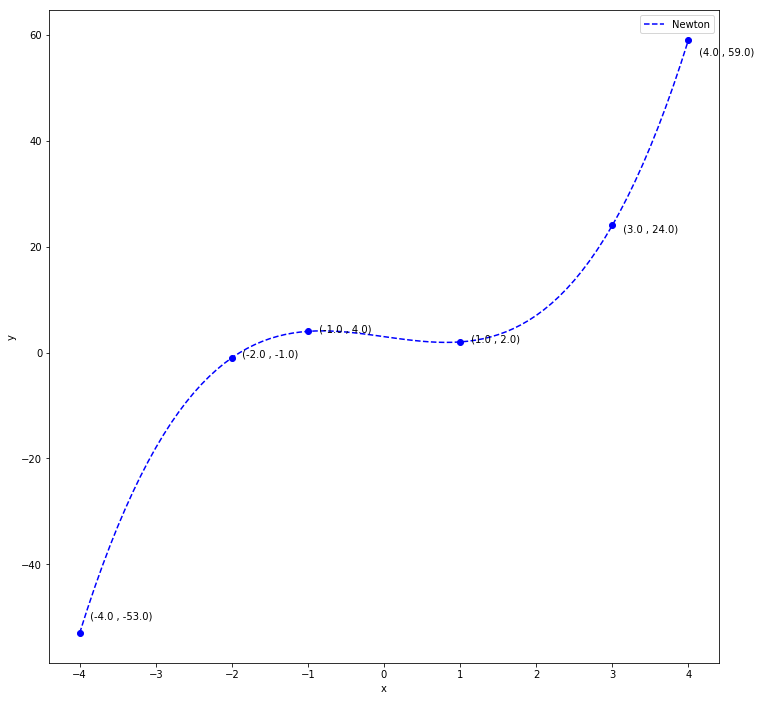

In [5]:
def NewtonDraw(xData, yData, fig, ax, color="blue", style="--", label=None):
    a = coeffts(xData, yData)
    
    x = np.arange(np.min(xData), np.max(xData)+0.1, 0.1)
    y = np.array( [evalPoly(a, xData, xi) for xi in x] )

    # Plot the points using matplotlib
    plt.plot(xData, yData, 'o', color=color)
    plt.xlabel('x')
    plt.ylabel('y')

    for i in range(len(xData)):
        ax.annotate(" (%.1f , %.1f)" % (xData[i],yData[i]) , xy=(xData[i], yData[i]), xytext=(xData[i]+0.1, yData[i]*0.95) )

    plt.plot(x, y, style, color=color, label=label)    
   

fig, ax = plt.subplots(figsize=(12, 12))
NewtonDraw(xData, yData, fig, ax, label="Newton")
ax.legend()

## Neville

In [6]:
def Neville(xData,yData,x):
    m = len(xData)   # number of data points
    y = yData.copy()
    for k in range(1,m):
        y[0:m-k] = ((x - xData[k:m])*y[0:m-k] +      \
                    (xData[0:m-k] - x)*y[1:m-k+1])/  \
                    (xData[0:m-k] - xData[k:m])
    return y[0]


In [7]:
def NevilleDraw(xData, yData, fig, ax, color="blue", label=None):    
    x = np.arange(np.min(xData), np.max(xData)+0.1, 0.1)
    y = np.array( [Neville(xData, yData, xi) for xi in x] )

    # Plot the points using matplotlib
    plt.plot(xData, yData, 'o', color=color)
    plt.xlabel('x')
    plt.ylabel('y')

    for i in range(len(xData)):
        ax.annotate(" (%.1f , %.1f)" % (xData[i],yData[i]) , xy=(xData[i], yData[i]), xytext=(xData[i]+0.1, yData[i]*0.95) )

    plt.plot(x, y, '--', color=color, label=label)            

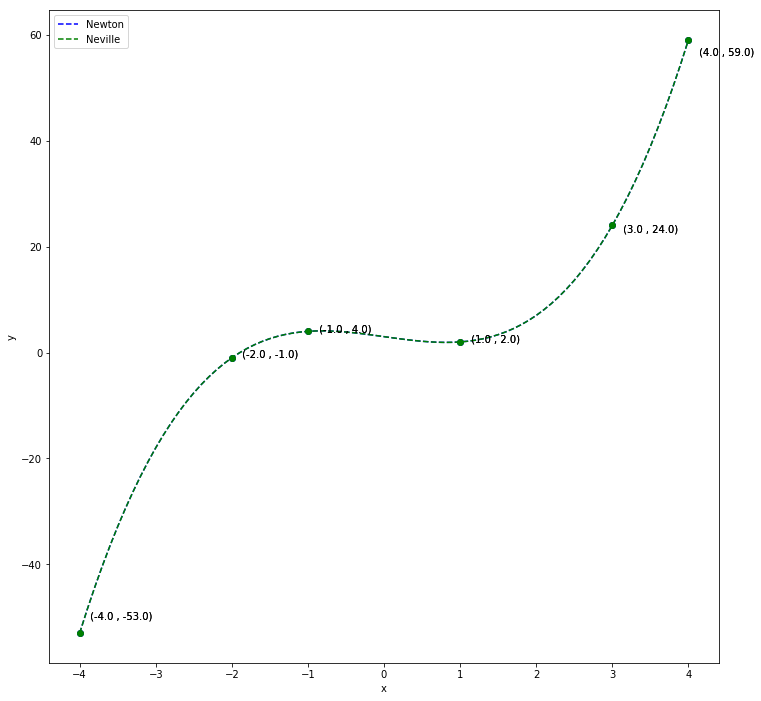

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))

xData = np.array([-2, 1,  4, -1,  3,  -4], dtype=np.float32)
yData = np.array([-1, 2, 59,  4, 24, -53], dtype=np.float32)

NewtonDraw(xData, yData, fig, ax, color="blue", label="Newton")
NevilleDraw(xData, yData, fig, ax, color="green", label="Neville")
ax.legend()

### adding more points


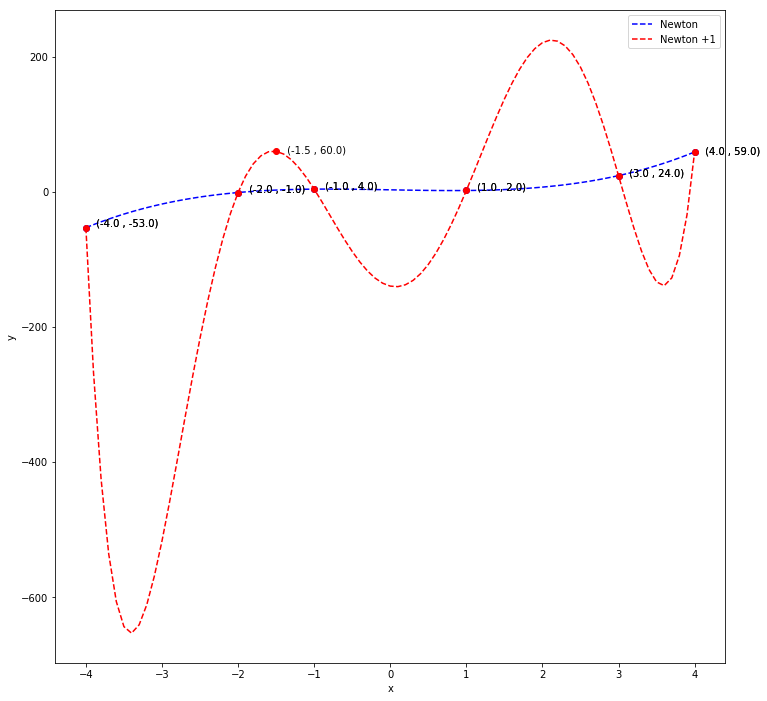

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))

xData = np.array([-2, 1,  4, -1,  3,  -4, -1.5], dtype=np.float32)
yData = np.array([-1, 2, 59,  4, 24, -53,  60], dtype=np.float32)
NewtonDraw(xData[:-1], yData[:-1], fig, ax, label="Newton")
NewtonDraw(xData, yData, fig, ax, color="red", label="Newton +1")
ax.legend()

## Cubic Spline Interpolation


In [10]:
import numpy as np

def curvatures(xData,yData):
    def LUdecomp3(c,d,e):
        n = len(d)
        for k in range(1,n):
            lam = c[k-1]/d[k-1]
            d[k] = d[k] - lam*e[k-1]
            c[k-1] = lam
        return c,d,e

    def LUsolve3(c,d,e,b):
        n = len(d)
        for k in range(1,n):
            b[k] = b[k] - c[k-1]*b[k-1]
        b[n-1] = b[n-1]/d[n-1]
        for k in range(n-2,-1,-1):
            b[k] = (b[k] - e[k]*b[k+1])/d[k]
        return b       
    
    n = len(xData) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0*(xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] =6.0*(yData[0:n-1] - yData[1:n]) \
                 /(xData[0:n-1] - xData[1:n]) \
             -6.0*(yData[1:n] - yData[2:n+1])   \
                 /(xData[1:n] - xData[2:n+1])
    LUdecomp3(c,d,e)
    LUsolve3(c,d,e,k)
    return k

def evalSpline(xData,yData,k,x):
    
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i = int( (iLeft + iRight)/2 )
            if x < xData[i]: iRight = i
            else: iLeft = i
    
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
      - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
      + (yData[i]*(x - xData[i+1])                            \
       - yData[i+1]*(x - xData[i]))/h
    return y
      
    
def CubicSplineDraw(xData, yData, fig, ax, color="blue", style="--", label=None):    
    reorder = np.argsort(xData)
    xData = xData.copy()[reorder]
    yData = yData.copy()[reorder]
    
    k = curvatures(xData, yData)
    
    x = np.arange(np.min(xData), np.max(xData)+0.1, 0.1)
    y = np.array( [evalSpline(xData, yData, k, xi) for xi in x] )

    # Plot the points using matplotlib
    plt.plot(xData, yData, 'o', color=color)
    plt.xlabel('x')
    plt.ylabel('y')

    for i in range(len(xData)):
        ax.annotate(" (%.1f , %.1f)" % (xData[i],yData[i]) , xy=(xData[i], yData[i]), xytext=(xData[i]+0.1, yData[i]*0.95) )

    plt.plot(x, y, style, color=color, label=label)        

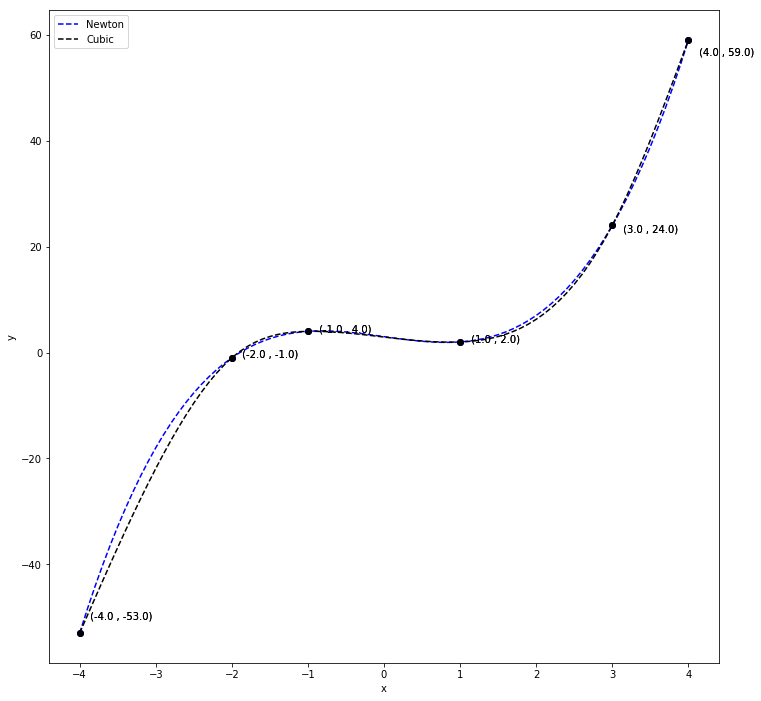

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))

xData = np.array([-2, 1,  4, -1,  3,  -4, -1.5], dtype=np.float32)
yData = np.array([-1, 2, 59,  4, 24, -53,  60], dtype=np.float32)

NewtonDraw(xData[:-1], yData[:-1], fig, ax, label="Newton")
CubicSplineDraw(xData[:-1], yData[:-1], fig, ax, color="black", label="Cubic")
ax.legend()

### adding more point

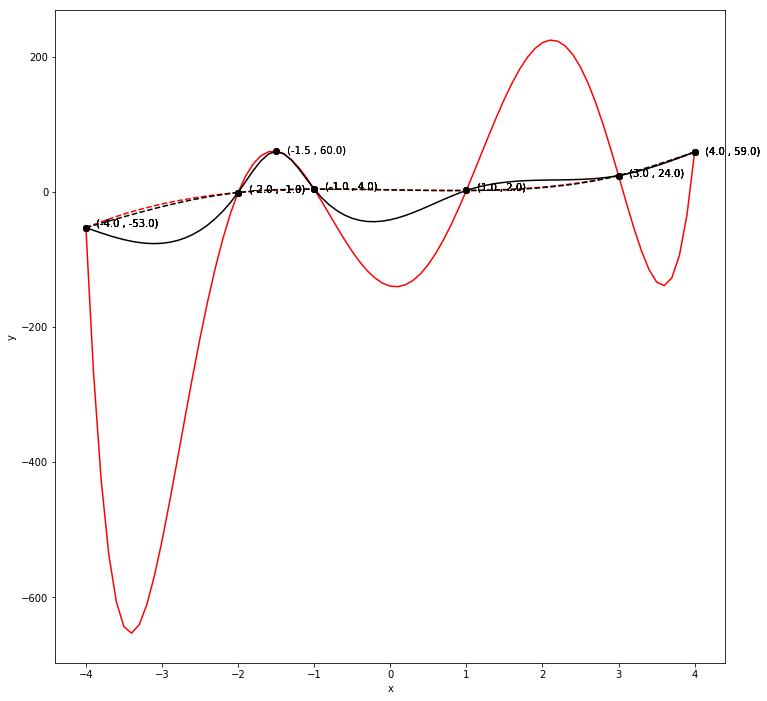

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
NewtonDraw(xData[:-1], yData[:-1], fig, ax, color="red", style="--", label="Newton")
NewtonDraw(xData, yData, fig, ax, color="red", style="-", label="Newton +1")
CubicSplineDraw(xData[:-1], yData[:-1], fig, ax, color="black", style="--", label="Cubic")
CubicSplineDraw(xData, yData, fig, ax, color="black", style="-", label="Cubic +1")

### example discussed in the lecture

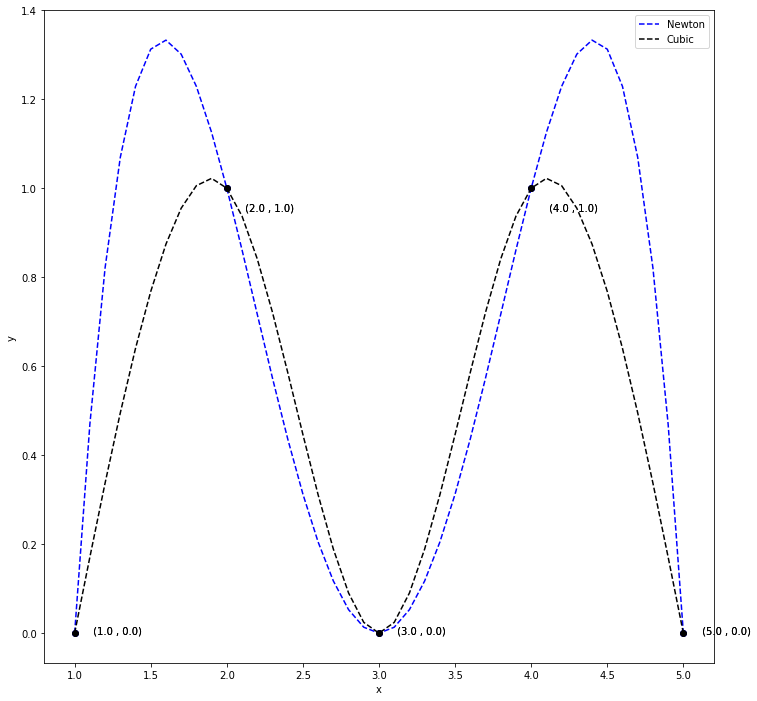

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))

xData = np.array([1, 2, 3, 4, 5], dtype=np.float32)
yData = np.array([0, 1, 0, 1, 0], dtype=np.float32)

NewtonDraw(xData, yData, fig, ax, label="Newton")
CubicSplineDraw(xData, yData, fig, ax, color="black", label="Cubic")
ax.legend()

### Polynomial Curve Fitting (regression)

In [ ]:
import numpy as np
import math


def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]
        
def swapCols(v,i,j):
    v[:,[i,j]] = v[:,[j,i]]

def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)
    
  # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
            
    for k in range(0,n-1):
        
      # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: raise Exception('Matrix is singular')
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
            
      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    if abs(a[n-1,n-1]) < tol:raise Exception('Matrix is singular')
                   
  # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]
    return gaussPivot(a,b)

def stdDev(c,xData,yData):
    
    def evalPoly(c,x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
        return p    
    
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2
    sigma = math.sqrt(sigma/(n - m))
    return sigma


def plotPoly(xData,yData,coeff, fig, ax, color="blue", style="--", label=None):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1)/20.0   
    x = np.arange(x1,x2 + dx/10.0,dx)
    y = np.zeros((len(x)))*1.0
    for i in range(m):
        y = y + coeff[i]*x**i
        
    plt.plot(xData, yData, 'o', color=color)
    plt.xlabel('x')
    plt.ylabel('y')
        
    plt.plot(x,y,style, color=color, label=label)        

    #plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

xData = np.array([12, 16, 20, 24, 28, 32, 12, 16, 20, 24, 28, 32, 12, 16, 20, 24, 28, 32], dtype=np.float32)
yData = np.array([8, 14, 16, 18, 20, 21, 9, 14.5, 17, 17, 20.5, 20.5, 7, 13, 16, 15, 19.5, 21.5], dtype=np.float32)

coeff1 = polyFit(xData,yData, 1)
plotPoly(xData,yData,coeff1, fig, ax, color="blue", style="-", label="rank 1")

coeff2 = polyFit(xData,yData, 2)
plotPoly(xData,yData,coeff2, fig, ax, color="green", style="-", label="rank 2")

coeff3 = polyFit(xData,yData, 3)
plotPoly(xData,yData,coeff3, fig, ax, color="red", style="-.", label="rank 3")

print(coeff1)
print(coeff2)
print(coeff3)


ax.legend()

### Multi-variate Curve Fitting (regression)

In [ ]:
x1 = np.array([1, 3, 7, 9, 2, 8, 5, 4, 2, 0], dtype=np.float32)
x2 = np.array([4, 8, 7, 3, 5, 6, 1, 1, 3, 4], dtype=np.float32)
y  = np.array([17, 33, 38, 30, 22, 37, 16, 14, 16, 15], dtype=np.float32)


In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))


axes[0].plot(x1, x2, 'o')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')

axes[1].plot(x1, y, 'o')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('y')

axes[2].plot(x2, y, 'o')
axes[2].set_xlabel('x2')
axes[2].set_ylabel('y')


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1,x2,y, 'o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')



### we need to solve the OLS normal equation

$$  \LARGE
𝐗^𝐓 𝐗𝐀=𝐗^𝐓 𝐘 
$$

We are looking for A and we know X and Y



## 1) we know x1,x2,y

In [ ]:
x1 = x1[:,np.newaxis] #column vector
x2 = x2[:,np.newaxis] #column vector
y  = y [:,np.newaxis] #column vector

print("x1, shape=", x1.shape, ":")
print(x1)
print("")
print("x2, shape=", x2.shape, ":")
print(x2)
print("")
print("y, shape=", y.shape, ":")
print(y)

### 2) we build x = [1, x1, x2]

In [ ]:
X = np.hstack([np.ones(shape=x1.shape), x1, x2])
print("X, shape=", X.shape, ":")
print(X)

### 3) we compute $X^T X$ and $X^T Y$ 

In [ ]:
XTX = np.matmul( np.transpose(X), X)
print("XTX, shape=", XTX.shape, ":")
print(XTX)
print("")
XTY = np.matmul( np.transpose(X), y)
print("XTY, shape=", XTY.shape, ":")
print(XTY)

### 4) we can solve the system via cholesky to find A

In [ ]:
import numpy as np
import math

def choleski(a):
    n = len(a)
    for k in range(n):
        try:
            a[k,k] = math.sqrt(a[k,k] - np.dot(a[k,0:k],a[k,0:k]))
        except ValueError:
            raise Exception('Matrix is not positive definite')
        for i in range(k+1,n):
            a[i,k] = (a[i,k] - np.dot(a[i,0:k],a[k,0:k]))/a[k,k]
    for k in range(1,n): a[0:k,k] = 0.0 #erase upper triangle
    return a

def choleskiSol(L,b):
    n = len(b)
  # Solution of [L]{y} = {b}  
    for k in range(n):
        b[k] = (b[k] - np.dot(L[k,0:k],b[0:k]))/L[k,k]
  # Solution of [L_transpose]{x} = {y}      
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(L[k+1:n,k],b[k+1:n]))/L[k,k]
    return b

L = choleski(XTX.copy())
A = choleskiSol(L, XTY.copy())

print("A, shape=", A.shape, ":")
print(A)

### 5) compute the linear regression using the coefficients A we found

In [ ]:
Y_OLS = np.matmul(X,A)
print("Y_OLS, shape=", Y_OLS.shape, ":")
print(Y_OLS)
print("")
print("comparing with Y:")
print(np.hstack([Y_OLS,y,Y_OLS-y]))

### 6) computing and drawing the plane defined by the points x1,y1,f(x1,y1)

In [ ]:
#building a grid
xx1    = []
xx2    = []
for gx1 in np.arange(x1.min(), x1.max(), 0.2):
    for gx2 in np.arange(x2.min(), x2.max(), 0.2):
        xx1+=[gx1]
        xx2+=[gx2]
xx1 = np.array(xx1, dtype=np.float32).reshape(-1,1)
xx2 = np.array(xx2, dtype=np.float32).reshape(-1,1)
XX = np.hstack([np.ones(shape=xx1.shape), xx1, xx2])
YY_OLS = np.matmul(XX,A)      

In [ ]:
YY_OLS.shape

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xx1[:,0],xx2[:,0],YY_OLS[:,0], color="green")
ax.plot(x1[:,0],x2[:,0],y[:,0], 'o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')